# TensorFlow

#### Models for: Linear Regression (Simple Regression), Linear Regression (Multiple Regression) and DNN Regression (Multiple Regression)

## Setup

In [2]:
# Load packages

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

sns.set_theme(style="ticks", color_codes=True)

2.8.1


## Data preparation

In [3]:
from car_prices_data_prep import *

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          533660 non-null  category
 1   brand         533660 non-null  category
 2   model         533660 non-null  category
 3   type          533660 non-null  category
 4   state         533660 non-null  category
 5   condition     533660 non-null  category
 6   miles         533660 non-null  float64 
 7   color         533660 non-null  category
 8   interior      533660 non-null  category
 9   seller        533660 non-null  category
 10  sellingprice  533660 non-null  int64   
 11  saledate      533660 non-null  category
dtypes: category(10), float64(1), int64(1)
memory usage: 19.6 MB


## Simple regression

In [9]:
# Select features for simple regression
features = ['miles']
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["sellingprice"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   miles   533660 non-null  float64
dtypes: float64(1)
memory usage: 8.1 MB
Missing values: 0


## Data splitting

In [10]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression

In [11]:
lm = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])

lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2022-04-25 17:54:19.033801: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# untrained model for first 10 values
lm.predict(X_train[:10])

array([[ 18958.656],
       [ 41835.03 ],
       [167700.31 ],
       [ 78319.8  ],
       [289501.5  ],
       [100831.04 ],
       [152017.94 ],
       [260605.47 ],
       [ 50535.586],
       [ 59648.965]], dtype=float32)

In [13]:
lm.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [15]:
%%time
history = lm.fit(
    X_train, y_train,
    epochs=10,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.1)

CPU times: user 1min 43s, sys: 18.3 s, total: 2min 1s
Wall time: 1min 16s


In [16]:
y_train

56243     13400
374437    13900
90062     12300
142456    25500
171477     3800
          ...  
125003    13800
277781    12900
387216     4600
147285    12000
137030     1200
Name: sellingprice, Length: 426928, dtype: int64

In [17]:
# Calculate R squared
from sklearn.metrics import r2_score

y_pred = lm.predict(X_train).astype(np.int64)
y_true = y_train.astype(np.int64)

r2_score(y_train, y_pred)  

0.30429073217306435

In [18]:
# slope coefficient
lm.layers[0].kernel

<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.07687239]], dtype=float32)>

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
5,5519.453613,5355.863281,5
6,5526.679688,5245.037598,6
7,5530.175293,5260.588379,7
8,5518.660156,5612.672852,8
9,5509.091797,5522.919434,9


In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

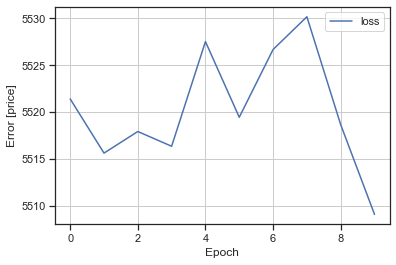

In [21]:
plot_loss(history)

In [22]:
test_results = {}

test_results['lm'] = lm.evaluate(
    X_test,
    y_test, verbose=0)

test_results

{'lm': 5545.23193359375}

In [23]:
x = tf.linspace(0.0, 6200, 6201)
y = lm.predict(x)

y

array([[18603.354],
       [18603.277],
       [18603.2  ],
       ...,
       [18126.898],
       [18126.822],
       [18126.744]], dtype=float32)

In [27]:
def plot_area(x, y):
  plt.scatter(X_train['miles'], y_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('miles')
  plt.ylabel('sellingprice')
  plt.legend()

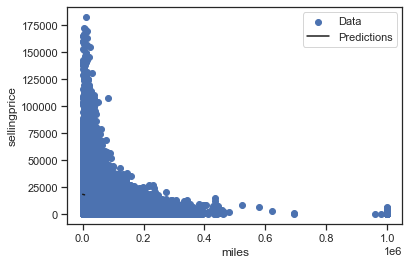

In [28]:
plot_area(x,y)

## Multiple Regression

In [5]:
# Select all relevant features
features= [
 'miles',
 'brand',
 'model',
 'type',
 'condition',
 'color'
  ]
X = df[features]

# Convert categorical to numeric
X = pd.get_dummies(X, columns=["brand", "model", "type", "condition", "color"])


X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["sellingprice"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Columns: 928 entries, miles to color_—
dtypes: float64(1), uint8(927)
memory usage: 479.9 MB
Missing values: 0


In [6]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lm_2 = tf.keras.Sequential([
    layers.Dense(units=1, input_shape=(928,))
])

lm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 929       
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


2022-06-23 12:15:04.424912: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
lm_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [9]:
%%time
history = lm_2.fit(
    X_train, y_train,
    epochs=10,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.1)

CPU times: user 2min 55s, sys: 42.3 s, total: 3min 37s
Wall time: 2min 2s


In [52]:
# Calculate R squared
from sklearn.metrics import r2_score

y_pred = lm_2.predict(X_train).astype(np.int64)
y_true = y_train.astype(np.int64)

r2_score(y_train, y_pred)  

0.5777636146970194

In [53]:
# slope coefficients
lm_2.layers[0].kernel

<tf.Variable 'dense_4/kernel:0' shape=(928, 1) dtype=float32, numpy=
array([[-7.05130175e-02],
       [ 3.21035889e+03],
       [ 3.91854919e+02],
       [ 3.40381030e+03],
       [ 9.49406311e+02],
       [ 4.92767578e+03],
       [ 1.46855164e+03],
       [ 2.79691113e+03],
       [ 1.98498547e+03],
       [ 1.49230347e+03],
       [ 2.35973820e-02],
       [ 1.59490808e+03],
       [ 3.36819458e+02],
       [ 1.60399994e+02],
       [ 1.62088776e+02],
       [ 2.73528271e+03],
       [ 2.79607334e+01],
       [ 3.59412329e+03],
       [ 2.19782910e+03],
       [ 1.66435986e+03],
       [ 8.68522095e+02],
       [ 4.94762061e+03],
       [-5.28686584e+02],
       [ 1.38789905e+03],
       [ 1.71281934e+03],
       [ 4.85817230e+02],
       [ 8.71207657e+01],
       [ 2.91826123e+03],
       [ 5.54406641e+03],
       [ 2.97398560e+03],
       [ 3.17592850e+01],
       [ 1.04245923e+03],
       [ 9.90187622e+02],
       [ 5.38700635e+03],
       [-5.08448090e+02],
       [ 1.84353040e+

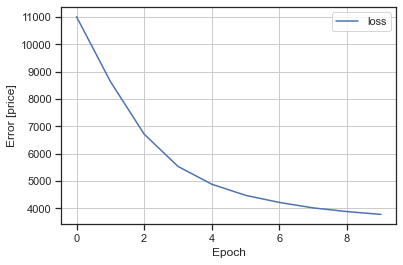

In [54]:
plot_loss(history)

In [55]:
test_results['lm_2'] = lm_2.evaluate(
    X_test, y_test, verbose=0)

## DNN regression

In [15]:
dnn_model = keras.Sequential([
      layers.Dense(units=1, input_shape=(928,)),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [16]:
%%time
history = dnn_model.fit(
    X_train, y_train,
    epochs=10,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.1)

CPU times: user 3min 21s, sys: 52.6 s, total: 4min 13s
Wall time: 2min 3s


In [17]:
X_train

,miles,brand_acura,brand_aston martin,brand_audi,brand_bentley,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,color_—
56243,11527.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374437,25436.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
90062,101963.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142456,47619.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171477,176019.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125003,21118.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277781,37620.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387216,112348.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147285,14610.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Calculate R squared
from sklearn.metrics import r2_score

y_pred = dnn_model.predict(X_train).astype(np.int64)
y_true = y_train.astype(np.int64)

r2_score(y_train, y_pred)  

0.7653947408228781

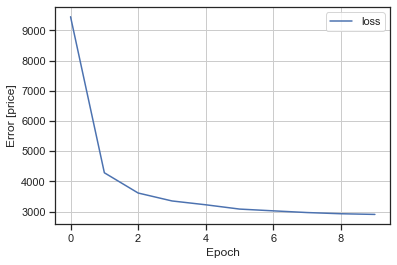

In [60]:
plot_loss(history)

In [61]:
test_results['dnn_model'] = dnn_model.evaluate(
    X_test, y_test, verbose=0)

## Performance comparision

In [62]:
pd.DataFrame(test_results, index=['Mean absolute error [sellingprice]']).T

,Mean absolute error [sellingprice]
lm,5545.231934
lm_2,3501.695801
dnn_model,2657.107910
